# Analýza dát big review dataset

In [2]:
import pandas as pd
from glob import glob as gg
import os
import re
import statistics
import collections
import string
import matplotlib.pyplot as plt 
import numpy as np

### Načítanie dát

Dáta v datasete sú rozdelené na 4 časti. Najprv sú dáta rozdelené na trénovacie a testovacie, a obe tieto skupiny sú rozdelene na pozitívne a negatívne recenzie.

Dataset sa teda skladá zo 4 x 12500 súborov, ktoré obsahujú text hodnotenia filmu, pričom názov každého hodnotenia je v tvare id_hodnotenie.txt

Každý záznam v načítanom datasete obsahuje tieto informácie:

- **review** - text hodnotenia filmu \n

- **positive** - informáciu o tom či ide o pozitívne alebo negatívne hodnotenie

- **review_id** - ID hodnotenia získané z názvu súboru

- **score** - číselné hodnotenie od 1-10 patriace k review-u.

Pozn. - Data sú načítané do štyroch rôznych dataFrame-ov a nakoniec spojene, aby bolo možné analyzovať jednotlivé časti aj celý dataset.


In [3]:
print('Nacitavam data...')

df = pd.DataFrame()
df_neg_train = pd.DataFrame()
mypath = 'aclImdb/train/neg/*.txt'
for f in gg(mypath):
    tmp = pd.read_csv(f, sep = '\r', names = ['review'], header=None)
    tmp['positive'] = 0
    filename = os.path.basename(f)
    score = filename[filename.find('_')+1:filename.find('.')]
    id = filename[:filename.find('_')]
    tmp['review_id'] = id
    tmp['score'] = score

    df_neg_train = pd.concat([df_neg_train, tmp], axis=0, ignore_index=True)
print('Negativne hodnotenia z casti train boli nacitane')
print('Pocet zaznamov:', end =" ")
print(len(df_neg_train))

df_pos_train = pd.DataFrame()
mypath = 'aclImdb/train/pos/*.txt'
for f in gg(mypath):
    tmp = pd.read_csv(f, sep = '\r', names = ['review'], header=None)
    tmp['positive'] = 1
    filename = os.path.basename(f)
    score = filename[filename.find('_')+1:filename.find('.')]
    id = filename[:filename.find('_')]
    tmp['review_id'] = id
    tmp['score'] = score

    df_pos_train = pd.concat([df_pos_train, tmp], axis=0, ignore_index=True)
print('Pozitivne hodnotenia z casti train boli nacitane')
print('Pocet zaznamov:', end =" ")
print(len(df_pos_train))

df_neg_test = pd.DataFrame()
mypath = 'aclImdb/test/neg/*.txt'
for f in gg(mypath):
    tmp = pd.read_csv(f, sep = '\r', names = ['review'], header=None)
    tmp['positive'] = 0
    filename = os.path.basename(f)
    score = filename[filename.find('_')+1:filename.find('.')]
    id = filename[:filename.find('_')]
    tmp['review_id'] = id
    tmp['score'] = score

    df_neg_test = pd.concat([df_neg_test, tmp], axis=0, ignore_index=True)
print('Negativne hodnotenia z casti test boli nacitane')
print('Pocet zaznamov:', end =" ")
print(len(df_neg_test))

df_pos_test = pd.DataFrame()
mypath = 'aclImdb/test/pos/*.txt'
for f in gg(mypath):
    tmp = pd.read_csv(f, sep = '\r', names = ['review'], header=None)
    tmp['positive'] = 1
    filename = os.path.basename(f)
    score = filename[filename.find('_')+1:filename.find('.')]
    id = filename[:filename.find('_')]
    tmp['review_id'] = id
    tmp['score'] = score

    df_pos_test = pd.concat([df_pos_test, tmp], axis=0, ignore_index=True)
print('Pozitivne hodnotenia z casti test boli nacitane')
print('Pocet zaznamov:', end =" ")
print(len(df_pos_test))

df = pd.concat([df_neg_train, df_pos_train, df_neg_test, df_pos_test])

Nacitavam data...
Negativne hodnotenia z casti train boli nacitane
Pocet zaznamov: 12500
Pozitivne hodnotenia z casti train boli nacitane
Pocet zaznamov: 12500
Negativne hodnotenia z casti test boli nacitane
Pocet zaznamov: 12500
Pozitivne hodnotenia z casti test boli nacitane
Pocet zaznamov: 12500


Ako môžeme vidieť dataset je rozdelený do štyroch rovnakých častí po 12500, takže celková veľkost datasetu je 50000 hodnotení, pričom 25000 je pozitívnych a 25000 negatívnych a pomer trénovacej a testovacej časti je 1:1

#### Analýza číselných hodnotení

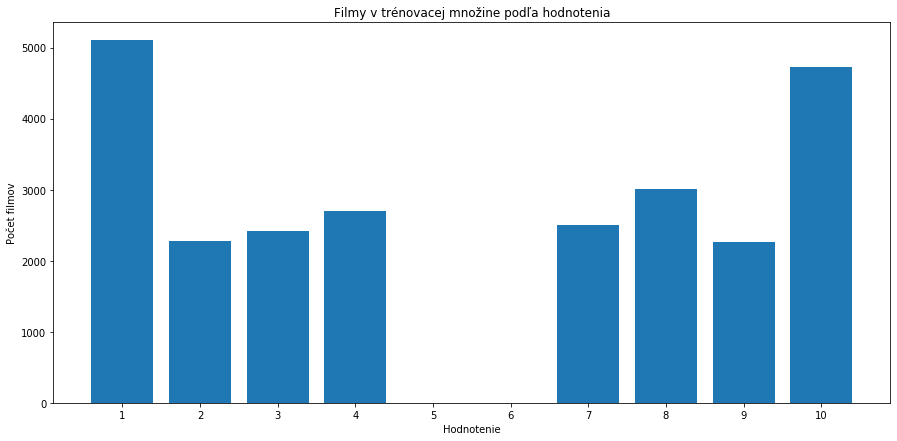

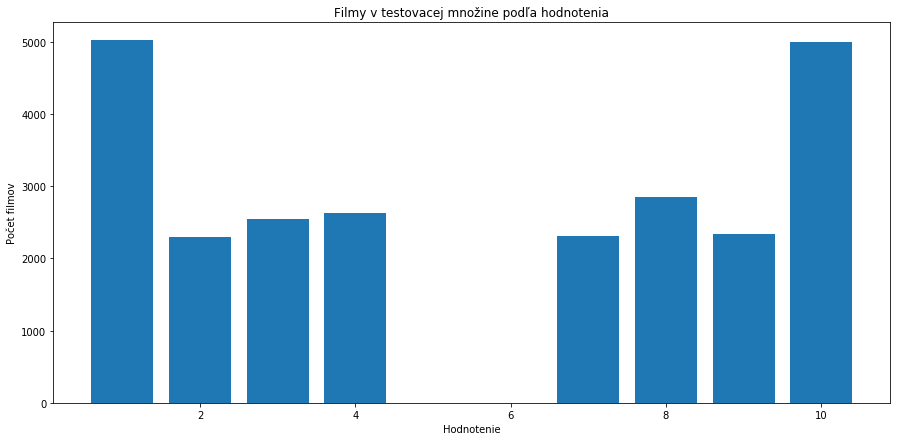

In [72]:
score_array_train = [0,0,0,0,0,0,0,0,0,0]
score_array_test = [0,0,0,0,0,0,0,0,0,0]
score = df_neg_train['score']
for number in score:
    score_array_train[int(number)-1] += 1
    
score = df_pos_train['score']
for number in score:
    score_array_train[int(number)-1] += 1
    
score = df_neg_test['score']
for number in score:
    score_array_test[int(number)-1] += 1
    
score = df_pos_test['score']
for number in score:
    score_array_test[int(number)-1] += 1    
    
plt.figure(figsize=(15,7))  
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.bar([1,2,3,4,5,6,7,8,9,10],score_array_train) 
plt.xlabel('Hodnotenie') 
plt.ylabel('Počet filmov') 
plt.title('Filmy v trénovacej množine podľa hodnotenia')
plt.show()

plt.figure(figsize=(15,7))  
plt.bar([1,2,3,4,5,6,7,8,9,10],score_array_test) 
plt.xlabel('Hodnotenie') 
plt.ylabel('Počet filmov') 
plt.title('Filmy v testovacej množine podľa hodnotenia')
plt.show()


Ako môžeme z grafu vidieť, negatívne hodnotenia majú hodnoty od 1 po 4 a pozitívne od 7 do 10. Taktiež môžeme vidieť že hodnotenia v trénovacej a testovacej skupine dát sú veľmi podobné.

#### Analýza textových hodnotení

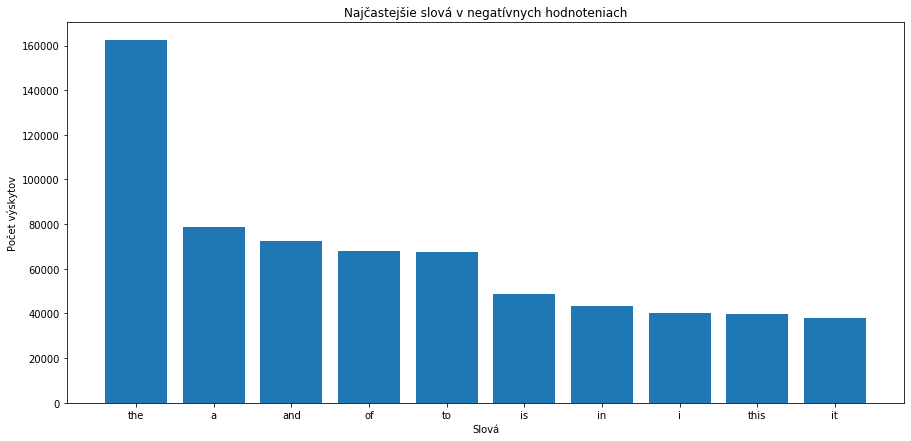

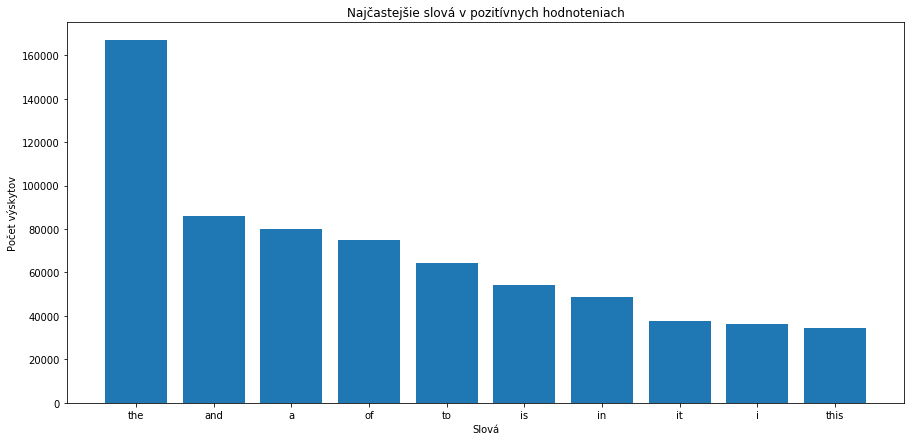

In [73]:
reviews = df_neg_test['review']

wordcount = {}
for review in reviews:
    review = review.translate(str.maketrans('', '', string.punctuation))
    for word in review.lower().split():
        if word not in wordcount:
            wordcount[word] = 1
        else:
             wordcount[word] += 1
            
word_counter = collections.Counter(wordcount)
common_words = []
common_value = []
for word, count in word_counter.most_common(10):
    common_words.append(word)
    common_value.append(count)
    


plt.figure(figsize=(15,7))  
plt.bar(common_words,common_value) 
plt.xlabel('Slová') 
plt.ylabel('Počet výskytov') 
plt.title('Najčastejšie slová v negatívnych hodnoteniach')
plt.show()
           
reviews = df_pos_test['review']

wordcount = {}
for review in reviews:
    review = review.translate(str.maketrans('', '', string.punctuation))
    for word in review.lower().split():
        if word not in wordcount:
            wordcount[word] = 1
        else:
             wordcount[word] += 1
            
word_counter = collections.Counter(wordcount)
common_words = []
common_value = []
for word, count in word_counter.most_common(10):
    common_words.append(word)
    common_value.append(count)
    


plt.figure(figsize=(15,7))  
plt.bar(common_words,common_value)
plt.xlabel('Slová') 
plt.ylabel('Počet výskytov')  
plt.title('Najčastejšie slová v pozitívnych hodnoteniach')
plt.show()           

Ako môžeme vidieť tak najčastejšie vyskytujúce slová v hodnoteniach sú väčšisou stop slová (stop words), teda slová, ktoré same o sebe nemajú žiadny význam. Taktiež môžeme vidieť, že najčastejšie slová pre pozitívne a negatívne hodnotenia sú veľmi podobné. Keďže takýto histogram slov nám žiadne užitocné informácie nepriniesol, vytvorili sme ešte wordcloud najčastejších slov.

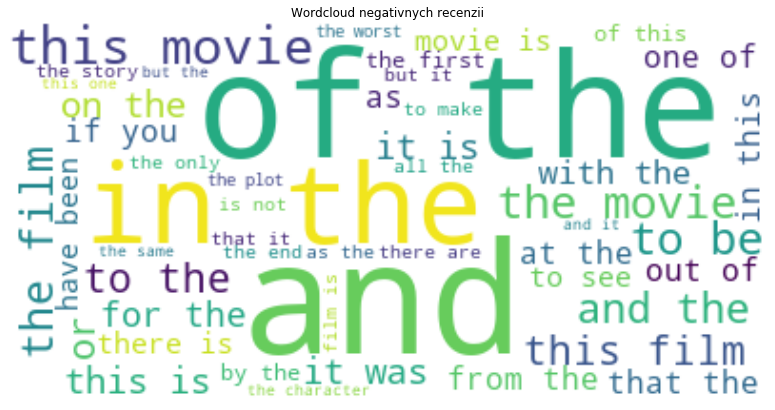

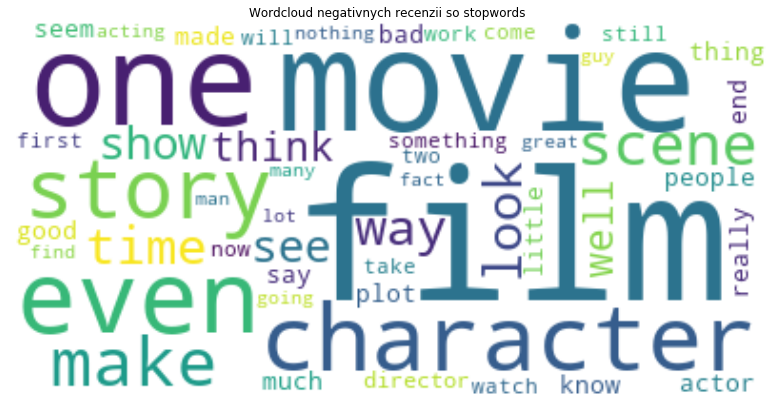

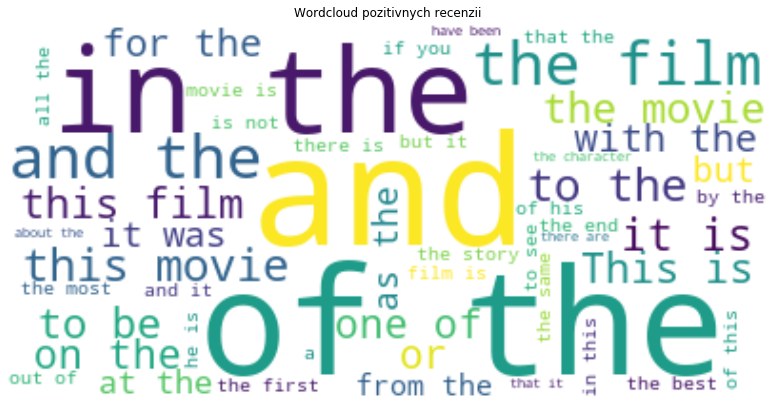

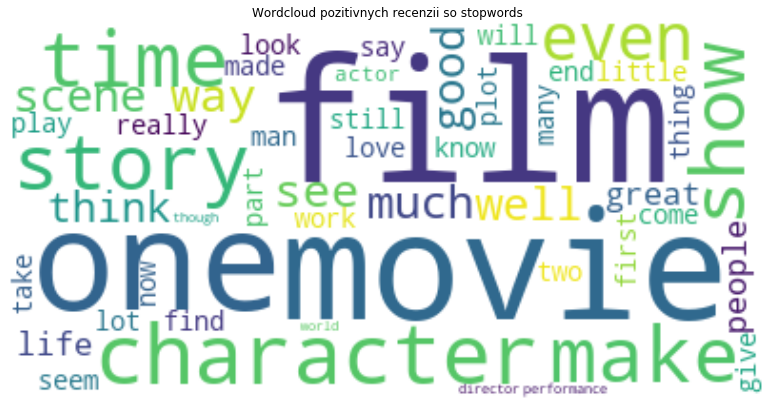

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["br"])
text = " ".join(review for review in df_neg_train['review'])
                
wordcloud = WordCloud(stopwords = ['br'],max_words = 50, background_color="white").generate(text)

 
plt.figure(figsize=(15,7))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud negativnych recenzii')   
plt.axis("off")
plt.show()                

                
wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color="white").generate(text)

 
plt.figure(figsize=(15,7))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud negativnych recenzii so stopwords') 
plt.axis("off")
plt.show()    

text = " ".join(review for review in df_pos_train['review'])

wordcloud = WordCloud(stopwords = ['br'],max_words = 50, background_color="white").generate(text)
 
plt.figure(figsize=(15,7))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud pozitivnych recenzii') 
plt.axis("off")
plt.show()    

wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color="white").generate(text)
 
plt.figure(figsize=(15,7))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud pozitivnych recenzii so stopwords') 
plt.axis("off")
plt.show()  

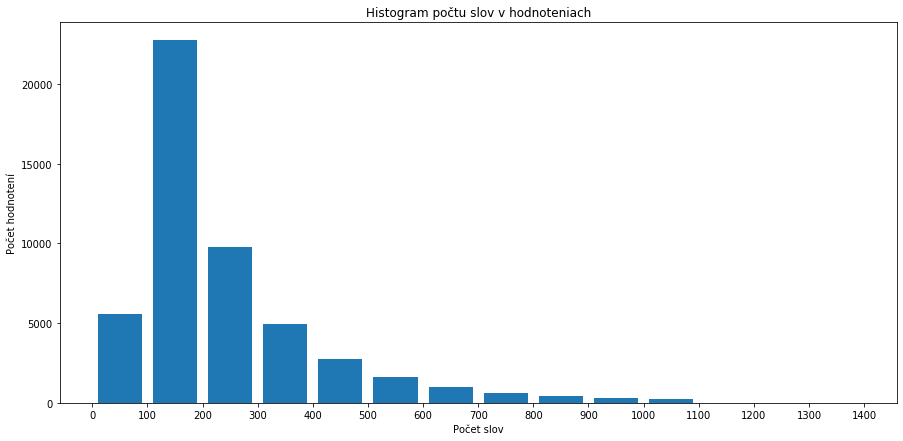

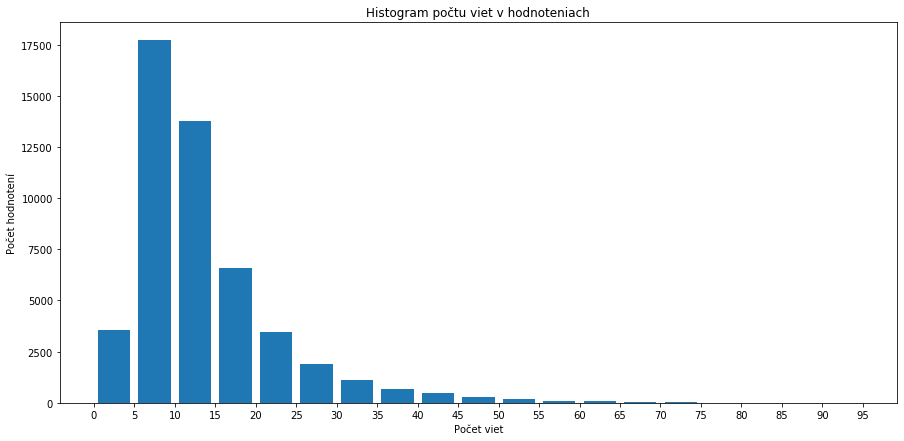

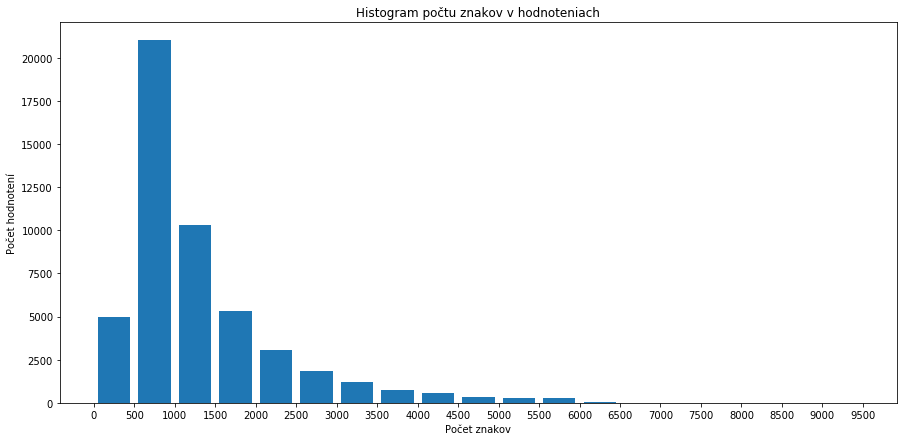

In [31]:
reviews = df['review']
words = [0] * len(df)
sentences = [0] * len(df)
lengths = [0] * len(df)
for i,rev in enumerate(reviews):
    words[i] = len(re.findall(r'\w+', rev))
    sentences[i] = len(re.findall('[^.!?]+[.!?]', rev))
    lengths[i] = len(rev)

    
bins = list(range(0,1500,100))
       
plt.figure(figsize=(15,7))    
plt.xlabel('Počet slov') 
plt.ylabel('Počet hodnotení') 
plt.title('Histogram počtu slov v hodnoteniach')     
plt.xticks(bins)
 
                                     
plt.hist(words, bins, range = (0,max(words)),  
         histtype = 'bar',rwidth = 0.8,) 
plt.show()

bins =  list(range(0,100,5))
    
    
plt.figure(figsize=(15,7))    
plt.xlabel('Počet viet') 
plt.ylabel('Počet hodnotení') 
plt.title('Histogram počtu viet v hodnoteniach')      
plt.xticks(bins)


plt.hist(sentences, bins, range = (0,max(words)), 
         histtype = 'bar',rwidth = 0.8,density = False) 
plt.show()

bins = list(range(0,10000,500))
       
plt.figure(figsize=(15,7))    
plt.xlabel('Počet znakov') 
plt.ylabel('Počet hodnotení') 
plt.title('Histogram počtu znakov v hodnoteniach')     
plt.xticks(bins)
 
                                     
plt.hist(lengths, bins, range = (0,max(words)),  
         histtype = 'bar',rwidth = 0.8,) 
plt.show()

**Ďalšie štatistiky textových hodnotení**

In [75]:
print('Priemerný počet slov v hodnotení:', end =" ") 
print(statistics.mean(words))
print('Priemerný počet viet v hodnotení:', end =" " )
print(statistics.mean(sentences))
print('Priemerný počet viet v hodnotení:', end =" " )
print(statistics.mean(lengths))

print('Median počtu slov v hodnotení:', end =" ")
print(statistics.median(words))
print('Median počtu viet v hodnotení:', end =" ")
print(statistics.median(sentences))

print('Modus počtu slov v hodnotení:', end =" ")
print(statistics.mode(words))
print('Modus počtu viet v hodnotení:', end =" ")
print(statistics.mode(sentences))

print('Maximálny počet slov v hodnotení:', end =" ")
print(max(words))
print('Maximálny počet viet v hodnotení:', end =" ")
print(max(sentences))
print('Maximálny počet znakov v hodnotení:', end =" ")
print(max(lengths))


Priemerný počet slov v hodnotení: 239.53788
Priemerný počet viet v hodnotení: 13.14862
Priemerný počet viet v hodnotení: 1309.38738
Median počtu slov v hodnotení: 179.0
Median počtu viet v hodnotení: 11.0
Modus počtu slov v hodnotení: 137
Modus počtu viet v hodnotení: 8
Maximálny počet slov v hodnotení: 2525
Maximálny počet viet v hodnotení: 282
Maximálny počet znakov v hodnotení: 13704
